# Bitcoin

            ds         yhat   yhat_lower   yhat_upper
365 2018-08-27  6921.884560  6264.266586  7584.626355
366 2018-08-28  7020.733505  6372.391553  7691.399317
367 2018-08-29  7030.025099  6326.920600  7720.840177
368 2018-08-30  7101.999632  6386.441785  7835.623913
369 2018-08-31  7189.315410  6372.721738  7947.674596
RMSE: 519.0256994613029
R²: 0.9741054009619244


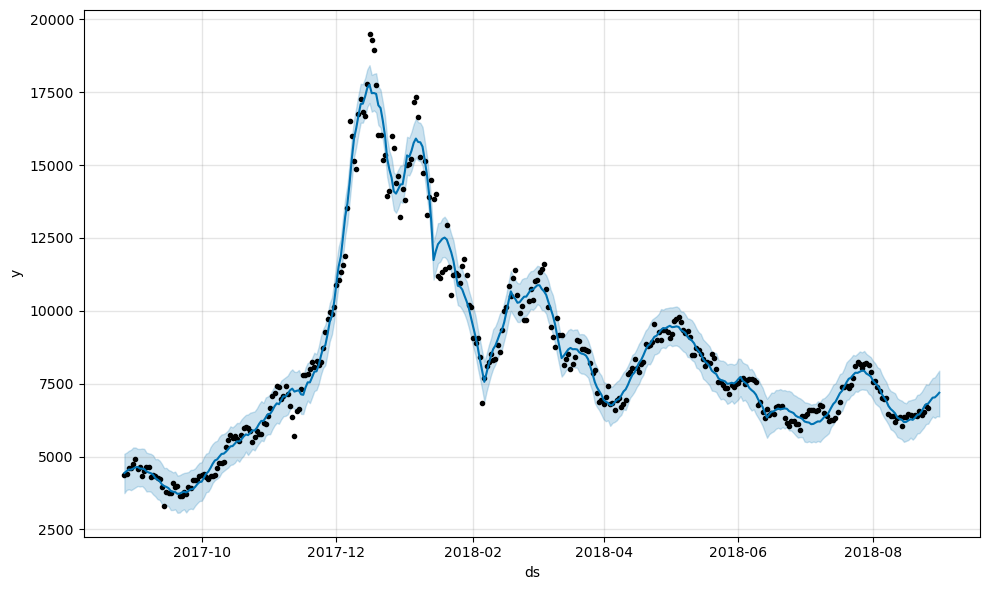

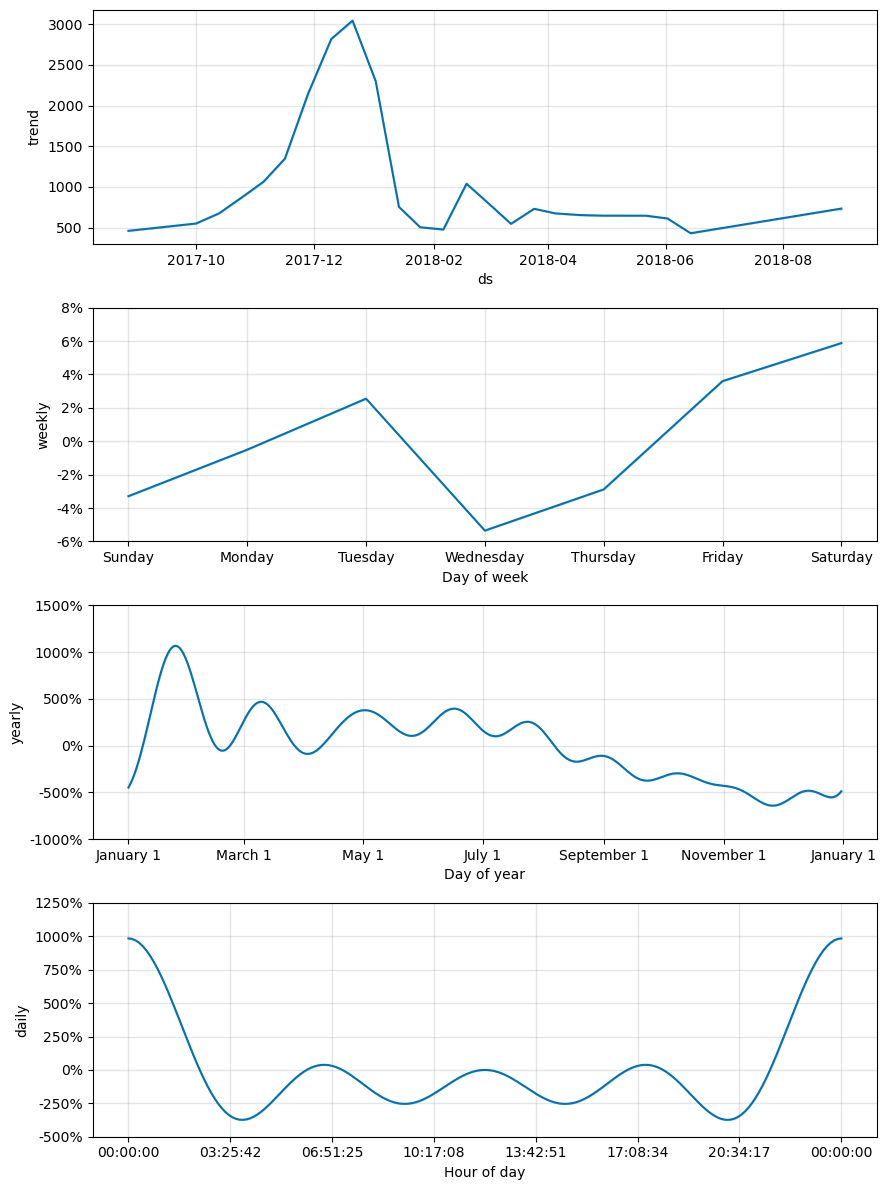

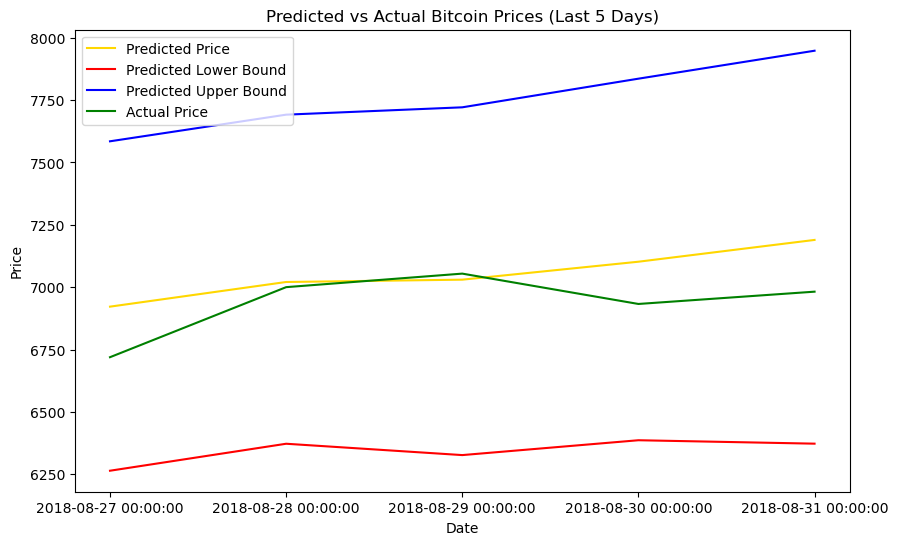

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import logging
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

# Load the training data
file_path = 'market-price.csv'
test_file_path = 'market-price-test.csv'

# Load data and set column names
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])

# Train the Prophet model
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# Make future predictions (5 additional days)
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

# Print the last 5 days of predictions
print(forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

# Plot the forecast
fig1 = prophet.plot(forecast_data)
fig2 = prophet.plot_components(forecast_data)

# Align actual and predicted data
y = bitcoin_df.y.values[5:]  # exclude the first 5 days of actual data
y_pred = forecast_data.yhat.values[5:len(bitcoin_df)]  # exclude first 5 days of predicted data

# Calculate RMSE and R²
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Load the test data
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# Get predicted values for the last 5 days (test period)
pred_y = forecast_data.yhat.values[-5:]  # Predictions for the last 5 days
pred_y_lower = forecast_data.yhat_lower.values[-5:]  # Lower bound of predictions
pred_y_upper = forecast_data.yhat_upper.values[-5:]  # Upper bound of predictions
test_y = bitcoin_test_df.y.values  # Actual values from the test file

# Plot predicted and actual prices
plt.figure(figsize=(10, 6))
dates = bitcoin_test_df.ds.values  # Use test set dates for x-axis
plt.plot(dates, pred_y, color="gold", label="Predicted Price")
plt.plot(dates, pred_y_lower, color="red", label="Predicted Lower Bound")
plt.plot(dates, pred_y_upper, color="blue", label="Predicted Upper Bound")
plt.plot(dates, test_y, color="green", label="Actual Price")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted vs Actual Bitcoin Prices (Last 5 Days)')
plt.legend()
plt.show()